In [2]:
import numpy as np
from lab_mf_toolbox.Multifractal_tools_box_Python_HMCo_ENPC_v_0_93 import DTM
from parsivel.read_write import pars_read_from_pickle
from multifractal_analysis.general import closest_smaller_power_of_2, slice_to_power_of_2
from multifractal_analysis.double_trace_moment import get_um_params_dtm
from pandas import DataFrame
from pathlib import Path
from matplotlib import pyplot as plt
data_folder = Path("/home/marcio/stage_project/data/saved_events/pars_events")

In [3]:
##function for finding nearest power of 2
def floor_log(num, base):
    if num < 0:
        raise ValueError("Non-negative number only.")
    if num == 0:
        return 0
    return base ** int(np.log(num, base))

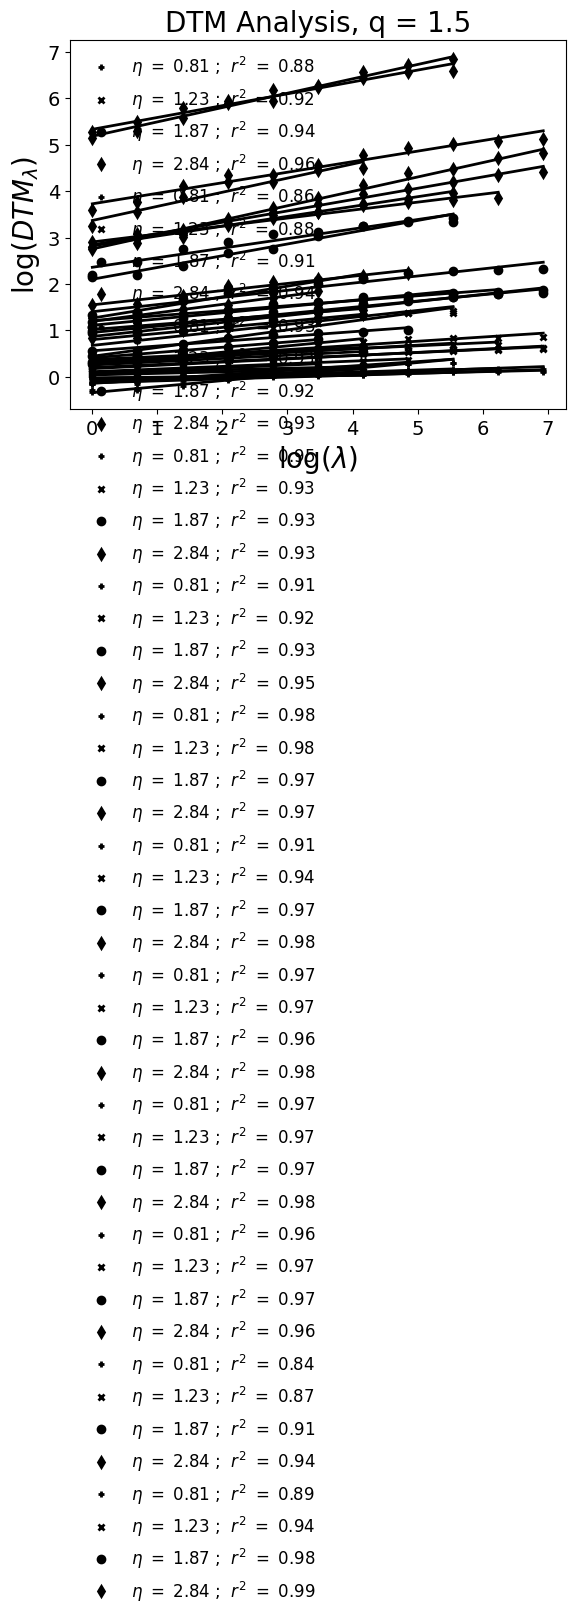

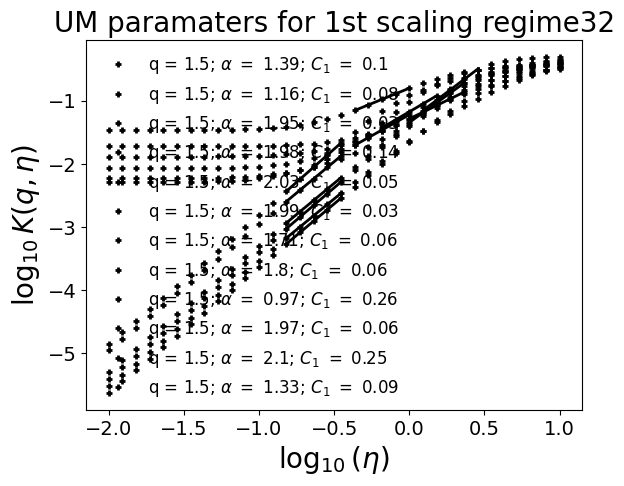

In [6]:
results = []
for file in data_folder.iterdir():
    pars_event = pars_read_from_pickle(file)
    R_data_all = pars_event.rain_rate
    N_org = len(R_data_all)
    edata = R_data_all
    data_name = "first"
    N = closest_smaller_power_of_2(edata.size)
    edata = np.nan_to_num(R_data_all)
    # N fitting with data - N with max cumulative value
    ##script that reshapes data to power of 2 based on maximum cumulative rainfall rate
    data = slice_to_power_of_2(edata)
    ###changing nan (not a number) to zero
    data = np.nan_to_num(data)

    ##Normailizing data
    data = data / np.nanmean(data)
    data = data.reshape((-1,1))

    ##TM analysis
    dim = 1
    data_file_name = ""
    l_range = [(1, N)]
    file_index = 0
    q_values = np.array([-1])
    file_name = "TM_test_truc.npy"
    plot_index = 5
    DTM_index = 1
    q_values = np.array([1.5])
    plot_index = 30

    UM_par_1, UM_par_2, UM_par_3 = DTM(
        data,
        q_values,
        data_file_name,
        dim,
        l_range,
        DTM_index,
        file_index,
        file_name,
        plot_index,
    )

    # first scaling regime
    alpha_DTM = UM_par_1[0]
    C1_DTM = UM_par_1[1]

    # My code
    alpha, c1 = get_um_params_dtm(data, 1.5)
    #alpha, c1 = 0,0
    results.append((file.name, alpha_DTM, C1_DTM, alpha, c1))
    # break
results = DataFrame(results, columns=["name", "alphaDTM_A", "c1DTM_A","alphaDTM_M", "c1DTM_M"])

In [7]:
results.set_index("name")

,alphaDTM_A,c1DTM_A,alphaDTM_M,c1DTM_M
name,,,,
event10.obj,1.397756,0.101252,1.397756,0.101252
event02.obj,1.166570,0.082108,1.166570,0.082108
event01.obj,1.955022,0.035497,1.955022,0.035497
event07.obj,1.987526,0.142423,1.987526,0.142423
event03.obj,2.038145,0.057463,2.038145,0.057463
event09.obj,1.998412,0.030783,1.998412,0.030783
event06.obj,1.716682,0.064235,1.716682,0.064235
event12.obj,1.806862,0.066679,1.806862,0.066679
event08.obj,0.972448,0.261863,0.972448,0.261863


In [ ]:
results.set_index("name")

,alphaDTM_A,c1DTM_A,alphaDTM_M,c1DTM_M
name,,,,
event16.obj,0.972448,0.261863,0.972448,0.261863
event10.obj,0.728771,0.204581,0.728771,0.204581
event08.obj,1.035981,0.117918,1.035981,0.117918
event30.obj,0.487716,0.204709,0.487716,0.204709
event27.obj,1.034766,0.154946,1.034766,0.154946
event13.obj,0.926557,0.255835,0.926557,0.255835
event20.obj,0.864969,0.359272,0.864969,0.359272
event24.obj,1.489873,0.129409,1.489873,0.129409
event25.obj,1.030453,0.140163,1.030453,0.140163
